In [2]:
import pandas
from geosnap import Community
from geosnap import datasets
import fiona
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
import segregation

C:\Users\fiend\.conda\envs\capstone\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.spectral module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


TO DO: <br>
- What are the 9 extra entries in the school district shapefiles?<br><br>
- Construct community from school district files/merge census data<br><br>
- Figure out discrepancy between n of districts and LCFF data <br><br>
- Create dictionaries using achievement data files in a *student group > ELA > math* format <br><br>
- Determine viability of FRPM as an indicator of segregation vs traditional segregation measures


In [2]:
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_column', 500)

# California school district shapefiles

TIGER/line shapefiles downloaded from [the census website](https://www.census.gov/cgi-bin/geo/shapefiles/index.php). Shapefiles are read in with geopandas as a geodataframe. 

In [3]:
ele = geopandas.read_file("districts_tiger/tl_2015_us_sde.shp")

In [6]:
ele.shape

(2155, 15)

In [4]:
seco = geopandas.read_file("districts_tiger/tl_2015_us_sds.shp")

In [9]:
seco.shape

(517, 15)

In [1]:
uni = geopandas.read_file("districts_tiger/tl_2015_us_sdu.shp")

NameError: name 'geopandas' is not defined

In [ ]:
uni.shape

In [12]:
532 + 112 + 342
# entries in ele, seco, and uni. 
# ballotpedia lists 977 school districts in california

986

In [13]:
986 - 977
# What are these?

9

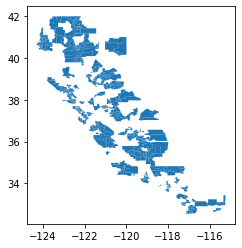

In [15]:
ele = ele.loc[ele['STATEFP'] == '06']
ele.plot()
# elementary school districts in California

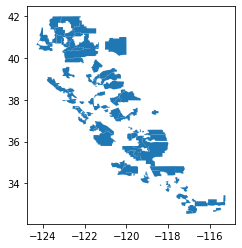

In [16]:
seco = seco.loc[seco['STATEFP'] == '06']
seco.plot()
# secondary school districts in California

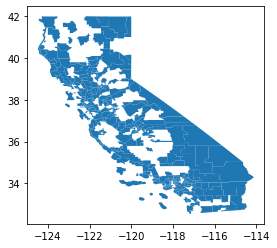

In [17]:
uni = uni.loc[uni['STATEFP'] == '06']
uni.plot()
# unified school districts in California

## Combining shapefiles into single geodataframe

In [7]:
ele['origin'] = 'elementary'

In [8]:
seco['origin'] = 'secondary'

In [9]:
uni['origin'] = 'unified'

In [10]:
adistricts = uni.append([ele, seco])
#all districts

In [11]:
adistricts.shape

(13590, 18)

In [12]:
adistricts.head(100)

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,origin,ELSDLEA,SCSDLEA
0,01,00001,0100001,Fort Rucker School District,00,KG,12,G5420,B,E,233061598,2735224,+31.4097368,-085.7458071,"POLYGON ((-85.86572 31.45470, -85.86543 31.454...",unified,NaN,NaN
1,01,00003,0100003,Maxwell AFB School District,00,KG,12,G5420,B,E,8476761,566857,+32.3809438,-086.3637490,"POLYGON ((-86.37655 32.39358, -86.37621 32.393...",unified,NaN,NaN
2,01,00005,0100005,Albertville City School District,00,KG,12,G5420,None,E,68731806,258708,+34.2631303,-086.2106600,"MULTIPOLYGON (((-86.25104 34.25266, -86.25060 ...",unified,NaN,NaN
3,01,00006,0100006,Marshall County School District,00,PK,12,G5420,None,E,1267334414,103647100,+34.3739971,-086.3442702,"MULTIPOLYGON (((-86.10870 34.19063, -86.10873 ...",unified,NaN,NaN
4,01,00007,0100007,Hoover City School District,00,KG,12,G5420,None,E,121282932,2553269,+33.3769487,-086.8055789,"MULTIPOLYGON (((-86.66393 33.40902, -86.66333 ...",unified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01,02430,0102430,Montgomery County School District,00,PK,12,G5420,None,E,2022892487,39825946,+32.2028812,-086.2044615,"POLYGON ((-86.49853 32.33975, -86.49850 32.339...",unified,NaN,NaN
96,01,02480,0102480,Morgan County School District,00,PK,12,G5420,None,E,1334314220,33582000,+34.4410724,-086.8331885,"MULTIPOLYGON (((-86.91459 34.54447, -86.91409 ...",unified,NaN,NaN
97,01,02490,0102490,Mountain Brook City School District,00,KG,12,G5420,None,E,33228843,62886,+33.4914885,-086.7344699,"MULTIPOLYGON (((-86.69745 33.51919, -86.69727 ...",unified,NaN,NaN
98,01,02520,0102520,Muscle Shoals City School District,00,PK,12,G5420,None,E,39765816,53102,+34.7431698,-087.6337614,"MULTIPOLYGON (((-87.57794 34.72144, -87.57555 ...",unified,NaN,NaN


In [14]:
district_names = adistricts['NAME']

In [24]:
ela_district_names = ela['districtname']

In [15]:
district_names.unique()
# repeat for perfomance data
# loop over both sets of names to check which one's match
# reverse loop to reverify, see which ones are missing
# 2 lists of 
# create list of problem children

array(['Fort Rucker School District', 'Maxwell AFB School District',
       'Albertville City School District', ...,
       'Westosha Central High School District',
       'Union Grove Union High School District',
       'Lake Geneva-Genoa City Union High School District'], dtype=object)

In [39]:
adistrictunique = district_names.unique()

In [42]:
adistrictunique = adistrictunique.astype(str)

In [43]:
adistrictunique.sort()

In [44]:
adistrictunique

array(['A-C Central Community Unit School District 262',
       'A-H-S-T Community School District',
       'A.C.G.C. Public School District', ...,
       'Zumbrota-Mazeppa School District', 'Zuni Public Schools',
       'Zurich Elementary School District'], dtype='<U72')

In [26]:
elaunique = ela_district_names.unique()

In [33]:
elaunique[0:10]

array([nan, 'Atascadero Unified', 'Cayucos Elementary',
       'Lucia Mar Unified', 'Pleasant Valley Joint Union Elementary',
       'San Luis Coastal Unified', 'San Miguel Joint Union',
       'Shandon Joint Unified', 'Templeton Unified',
       'Paso Robles Joint Unified'], dtype=object)

In [34]:
elaunique = elaunique.astype(str)

In [36]:
elaunique.sort()

In [38]:
elaunique

array(['ABC Unified', 'Acalanes Union High', 'Ackerman Charter', ...,
       'Yuba County Office of Education',
       'Yucaipa-Calimesa Joint Unified', 'nan'], dtype='<U74')

In [33]:
edistricts = uni.append([ele])
#unified/elementary districts

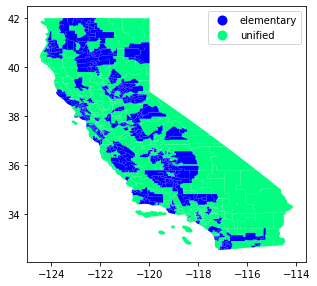

In [79]:
edistricts.plot(column='origin', 
                legend=True, 
                cmap='winter', 
                figsize=(5,5)
               )

#subplots


In [35]:
sdistricts = uni.append([seco])
#unified/secondary districts

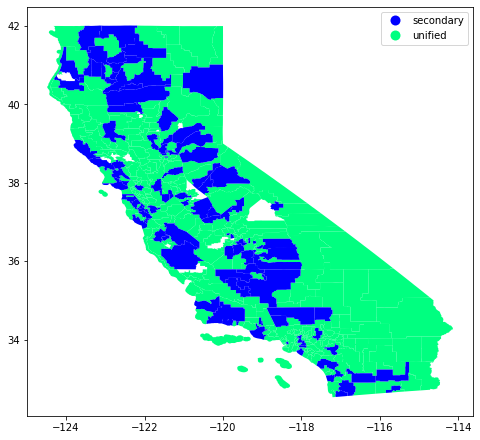

In [36]:
sdistricts.plot(column='origin',
                legend=True,
                cmap='winter', 
                figsize=(5,5)
               )

# LCFF funding data

In [17]:
lcff = pandas.read_csv('lcff_data/lcffsnapshot18an.csv')
lcff.shape

(2243, 26)

In [46]:
lcff

,County Code,District Code,School Code,Local Educational Agency,Charter Number,"TK/K-3 ADA\nTarget, B-5/B-1","4 - 6 ADA\nTarget, B-6/B-2","7 - 8 ADA\nTarget, B-7/B-3","9 - 12 ADA\nTarget, B-8/B-4","Unduplicated Pupil Percentage\nTarget, D-1","Base Grant Funding\nTarget, C-5","Supplemental Grant Funding\nTarget, D-7","Concentration Grant Funding\nTarget, E-8","Necessary Small Schools Allowance\nTarget, F-1","Add-On (Based on 2012-13 Targeted Instructional Improvement Block Grant)\nTarget, F-2","Add-On (Based on 2012-13 Home-to-School Transportation)\nTarget, F-3","Add-On (Based on 2012-13 Small School District Bus Replacement Program)\nTarget, F-4","Total LCFF Target Entitlement\nTarget, G-1/F-1","Total LCFF Floor Entitlement\nTransition, B-13","Current Year Gap Funding (100%)\nTransition, C-3","Economic Recovery Target\nTransition, D-1","Miscellaneous Adjustments\nTransition, E-1","Total Local Revenue or In-Lieu of Property Taxes\nTransition, F-2/F-7","Education Protection Account Entitlement\nTransition, F-5/F-9","Net State Aid\nTransition, F-6/F-10","Additional SA for MSA Guarantee\nTransition, H-1/H-2"
0,01,10017.0,112607.0,Envision Academy for Arts & Technology,811.0,-,-,-,359.23,0.7785,"$3,329,703","$518,435","$362,605",N/A,N/A,N/A,N/A,"$4,210,743","$3,871,076","$339,667",$-,$-,"$894,989","$683,070","$2,632,684",$-
1,01,10017.0,123968.0,Community School for Creative Education,1284.0,125.80,66.49,32.89,-,0.7936,"1,795,769","285,024","195,559",N/A,N/A,N/A,N/A,"2,276,352","2,124,388","151,964",-,-,"561,016","354,307","1,361,029",-
2,01,10017.0,124172.0,Yu Ming Charter,1296.0,252.38,134.11,48.83,-,0.1892,"3,474,375","131,471",-,N/A,N/A,N/A,N/A,"3,605,846","3,388,539","217,307",-,-,-,"683,750","2,922,096",-
3,01,10017.0,125567.0,Urban Montessori Charter,1383.0,271.70,101.50,26.45,-,0.3756,"3,212,111","241,293",-,N/A,N/A,N/A,N/A,"3,453,404","3,238,948","214,456",-,-,"995,692","627,724","1,829,988",-
4,01,10017.0,131581.0,Oakland Unity Middle School,1707.0,-,61.99,109.29,-,0.9199,"1,321,351","243,103","143,896",N/A,N/A,N/A,N/A,"1,708,350","1,620,979","87,371",-,-,"426,729","34,256","1,247,365",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,58,72744.0,0.0,Plumas Lake Elementary,NaN,615.24,400.21,277.70,-,0.3868,"10,261,440","793,825",-,-,"4,433","49,203",-,"11,108,901","10,433,605","675,296","355,998",-,"1,029,589","2,348,862","8,086,448",-
2239,58,72751.0,0.0,Wheatland,NaN,580.88,389.53,284.05,-,0.4783,"9,947,133","951,543",-,-,"97,971","237,702",-,"11,234,349","10,546,226","688,123","309,994",-,"1,007,306","1,944,794","8,592,243",-
2240,58,72751.0,6118806.0,Wheatland Charter Academy,370.0,64.96,29.33,-,-,0.5069,"757,003","76,745",-,N/A,N/A,N/A,N/A,"833,748","793,112","40,636",-,-,"75,713","148,563","609,472",-
2241,58,72769.0,0.0,Wheatland Union High,NaN,-,-,-,761.94,0.4283,"7,062,422","604,967",-,-,-,"185,239",-,"7,852,628","7,260,075","592,553",-,-,"2,191,152","1,422,027","4,239,449",-


In [53]:
funding_lookup = lcff['School Code'].dropna()

In [55]:
funding_lookup = funding_lookup.astype('int64')

In [21]:
lcff_filtered = lcff[lcff['Charter Number'].isnull()]
lcff_filtered.shape

(945, 26)

inherent problems in matches - accept as structural problems in data gathering and storage (opacity)

## ELA acheivement indicator data
Find the codebook [here](https://www.cde.ca.gov/ta/ac/cm/ela18.asp)

In [23]:
ela = pandas.read_csv('lcff_data/eladownload2018.csv')
ela.shape

C:\Users\fiend\.conda\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(148838, 32)

In [58]:
ela.head(50)
#Current Status - Average distance from Standard of students who took the Smarter Balanced summative assessment in ELA
#can use with 'prior status' or 'change' to illustrate performance

,cds,rtype,schoolname,districtname,countyname,charter_flag,coe_flag,dass_flag,studentgroup,currdenom,currdenom_swd,currstatus,priordenom,priordenom_swd,priorstatus,change,statuslevel,changelevel,color,box,hscutpoints,curradjustment,prioradjustment,pairshare_method,caa_denom,caa_level1_num,caa_level1_pct,caa_level2_num,caa_level2_pct,caa_level3_num,caa_level3_pct,ReportingYear
17,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,AA,2,NaN,NaN,9.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
18,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,ALL,20,NaN,-157.0,17.0,NaN,-186.0,29.0,1,5,0,0,NaN,-12.75,-16.50,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
19,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,AS,1,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
20,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,EL,8,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
21,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,ELO,8,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
22,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,EO,8,NaN,NaN,15.0,NaN,-182.2,NaN,0,0,0,0,NaN,NaN,-15.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
23,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,FI,1,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
24,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,FOS,2,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
25,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,HI,14,NaN,-151.3,8.0,NaN,NaN,NaN,1,0,0,0,NaN,-9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
26,1100170000000,D,NaN,Alameda County Office of Education,Alameda,NaN,Y,NaN,HOM,2,NaN,NaN,6.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [49]:
ela.studentgroup.unique()
# Create dictionary in conjunction with math dataset?

array(['AA', 'AI', 'ALL', 'AS', 'EL', 'ELO', 'EO', 'FI', 'FOS', 'HI',
       'HOM', 'MR', 'PI', 'RFP', 'SED', 'SWD', 'WH'], dtype=object)

In [55]:
ela = ela.loc[ela['rtype'] == 'D']
# select district level performance

## Math achievement indicator data
find the codebook [here](https://www.cde.ca.gov/ta/ac/cm/math18.asp)

In [59]:
math = pandas.read_csv('lcff_data/mathdownload2018.csv')
math.shape

C:\Users\fiend\.conda\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(148705, 32)

In [60]:
math

,cds,rtype,schoolname,districtname,countyname,charter_flag,coe_flag,dass_flag,studentgroup,currdenom,currdenom_swd,currstatus,priordenom,priordenom_swd,priorstatus,change,statuslevel,changelevel,color,box,hscutpoints,curradjustment,prioradjustment,pairshare_method,caa_denom,caa_level1_num,caa_level1_pct,caa_level2_num,caa_level2_pct,caa_level3_num,caa_level3_pct,ReportingYear
0,0,X,NaN,NaN,NaN,NaN,NaN,NaN,AA,171493,NaN,-91.5,176285.0,NaN,-91.6,0.2,2,3,2,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,0,X,NaN,NaN,NaN,NaN,NaN,NaN,AI,16622,NaN,-73.0,17167.0,NaN,-72.3,-0.7,2,3,2,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,0,X,NaN,NaN,NaN,NaN,NaN,NaN,ALL,3166345,NaN,-36.4,3195814.0,NaN,-37.7,1.3,2,3,2,180,NaN,NaN,NaN,NaN,36002.0,23217.0,64.5,9948.0,27.6,2837.0,7.9,2018
3,0,X,NaN,NaN,NaN,NaN,NaN,NaN,AS,293068,NaN,56.7,295229.0,NaN,54.3,2.4,5,3,5,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,0,X,NaN,NaN,NaN,NaN,NaN,NaN,EL,999887,NaN,-69.9,1020711.0,NaN,-71.4,1.5,2,3,2,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148700,58727695838305,S,Wheatland Union High,Wheatland Union High,Yuba,NaN,NaN,NaN,PI,1,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
148701,58727695838305,S,Wheatland Union High,Wheatland Union High,Yuba,NaN,NaN,NaN,RFP,2,NaN,NaN,3.0,NaN,NaN,NaN,0,0,0,0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
148702,58727695838305,S,Wheatland Union High,Wheatland Union High,Yuba,NaN,NaN,NaN,SED,67,NaN,-90.0,54.0,NaN,-72.8,-17.2,2,1,2,160,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
148703,58727695838305,S,Wheatland Union High,Wheatland Union High,Yuba,NaN,NaN,NaN,SWD,17,17.0,-225.9,9.0,9.0,NaN,NaN,1,0,0,0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [61]:
math.studentgroup.unique()

array(['AA', 'AI', 'ALL', 'AS', 'EL', 'ELO', 'EO', 'FI', 'FOS', 'HI',
       'HOM', 'MR', 'PI', 'RFP', 'SED', 'SWD', 'WH'], dtype=object)

In [62]:
math = math.loc[math['rtype'] == 'D']
# select district level performance

Student group columns are shared by both performance indicators, can use to investigate performance by individual groups/impact by lcff funding. Create dictionaries using student groups and performance data?

In [68]:
perf = pandas.Series(math.currstatus.values,index=math.studentgroup).to_dict()
perf

{'AA': nan,
 'ALL': -65.8,
 'AS': nan,
 'EL': nan,
 'ELO': nan,
 'EO': -65.3,
 'FI': nan,
 'FOS': nan,
 'HI': -89.0,
 'HOM': nan,
 'MR': -91.6,
 'SED': -90.0,
 'SWD': -226.6,
 'AI': nan,
 'PI': nan,
 'RFP': nan,
 'WH': -42.3}

# Free and reduced meal plan data
Used by policy makers as a stand-in for a  segregation indicator.



In [46]:
frmp = pandas.read_csv('lcff_data/frpm1819.csv', encoding = "ISO-8859-1", skiprows=1)
frmp.shape

(10520, 28)

In [69]:
frmp['School Type'].unique()
# is there any reason to cut any of these out?

array(['High Schools (Public)', 'Elementary Schools (Public)',
       'Juvenile Court Schools', 'County Community',
       'Intermediate/Middle Schools (Public)', 'K-12 Schools (Public)',
       'Junior High Schools (Public)', 'State Special Schools', nan,
       'Alternative Schools of Choice', 'Continuation High Schools',
       'Special Education Schools (Public)',
       'Elemen Schools In 1 School Dist. (Public)',
       'District Community Day Schools', 'Opportunity Schools',
       'High Schools In 1 School Dist. (Public)', 'Preschool',
       'Youth Authority Facilities'], dtype=object)

In [65]:
frmp.head()
# lookup table

,Academic Year,County Code,District Code,School Code,County Name,District Name,School Name,District Type,School Type,Educational \nOption Type,...,Free Meal \nCount \n(K-12),Percent (%) \nEligible Free \n(K-12),FRPM Count \n(K-12),Percent (%) \nEligible FRPM \n(K-12),Enrollment \n(Ages 5-17),Free Meal \nCount \n(Ages 5-17),Percent (%) \nEligible Free \n(Ages 5-17),FRPM Count \n(Ages 5-17),Percent (%) \nEligible FRPM \n(Ages 5-17),CALPADS Fall 1 \nCertification Status
0,2018-2019,1,10017,112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,County Office of Education (COE),High Schools (Public),Traditional,...,262,68.1%,306,79.5%,370,249,67.3%,291,78.6%,Y
1,2018-2019,1,10017,123968,Alameda,Alameda County Office of Education,Community School for Creative Education,County Office of Education (COE),Elementary Schools (Public),Traditional,...,118,49.0%,120,49.8%,224,113,50.4%,115,51.3%,Y
2,2018-2019,1,10017,124172,Alameda,Alameda County Office of Education,Yu Ming Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,58,13.0%,64,14.4%,445,58,13.0%,64,14.4%,Y
3,2018-2019,1,10017,125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,113,26.2%,131,30.3%,418,111,26.6%,129,30.9%,Y
4,2018-2019,1,10017,130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,County Office of Education (COE),Juvenile Court Schools,Juvenile Court School,...,53,100.0%,53,100.0%,50,50,100.0%,50,100.0%,Y


In [ ]:
# frmp groupby district 
# 1) remove %
# 2) convert to int
# 3) groupby 
# 4) compare with dissimilarity index to validate proxy

In [50]:
frmp['District Code'].dtype

dtype('int64')

In [63]:
funding_lookup

0        112607
1        123968
2        124172
3        125567
4        131581
         ...   
2237    5830138
2238          0
2239          0
2240    6118806
2241          0
Name: School Code, Length: 2242, dtype: int64

In [62]:
frmp['District Code']

0        10017
1        10017
2        10017
3        10017
4        10017
         ...  
10515    72751
10516    72751
10517    72751
10518    72769
10519    72769
Name: District Code, Length: 10520, dtype: int64

In [59]:
good = [code for code in funding_lookup if code in frmp['District Code']]

In [61]:
good[-10:]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
for code in funding_lookup:
    if code in frmp['District Code']:
        print(code)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [70]:
frmp['Percent (%) \nEligible FRPM \n(K-12)']
# these are by school only.. will need to do an average to get a figure to represent the county, or do something else?

0         79.5%
1         49.8%
2         14.4%
3         30.3%
4        100.0%
          ...  
10515     39.3%
10516     55.1%
10517     43.9%
10518      0.0%
10519     44.1%
Name: Percent (%) \nEligible FRPM \n(K-12), Length: 10520, dtype: object

# Census Data

#### SCAG counties and their FIPS codes:
<br> Los Angeles (06037)<br> Orange (06059)<br> Riverside (06065)<br> San Bernardino (06071)<br> San Diego (06073)<br>Imperial (06025)<br> Ventura (06111)

In [ ]:
cacom = Community.from_census(state_fips='06')

In [ ]:
scag = Community.from_census(county_fips=['06025', '06037', '06059', '06071', '06111', '06073', '06065'])

In [ ]:
rivco = Community.from_census(county_fips=['06065'])

In [ ]:
orangeco = Community.from_census(county_fips=['06059'])

In [ ]:
laco = Community.from_census(county_fips=['06037'])

In [ ]:
sbco = Community.from_census(county_fips=['06071'])

In [ ]:
sdco = Community.from_census(county_fips=['06073'])

In [ ]:
f, ax = plt.subplots(1, figsize=(30, 30))
ax = rivco.gdf[rivco.gdf.year==2010].plot('p_poverty_rate_over_65', axes=ax)
plt.show()

# change gdf, variable, and year

### This 'plot' function will produce three maps, one from each of the census data years. We can use it to pass in communities and a specific variable to provide a preliminary view of changes over 30 years.

In [ ]:
def plot(community, column):
    fig, axs = plt.subplots(1,3, figsize=(20,20))
    axs=axs.flatten()
    
    community.gdf[community.gdf.year==1990].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Greens', k=7, ax=axs[0])
    axs[0].axis('off')
    axs[0].set_title('1990')

    community.gdf[community.gdf.year==2000].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Greens', k=7, ax=axs[1])
    axs[1].axis('off')
    axs[1].set_title('2000')

    community.gdf[community.gdf.year==2010].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Greens', k=7, ax=axs[2])
    axs[2].axis('off')
    axs[2].set_title('2010')

In [ ]:
datasets.codebook()

### Variables of interest from census:
#### economic indicators
median_household_income <br>
median_home_value OR median_contract_rent<br>
median_income_whitehh<br>
median_income_blackhh<br>
median_income_hispanichh<br>
n_edu_college_greater - persons with at least 4-year degree (also available as %)<br>
n_edu_hs_less - persons with less than high school (also available as %)<br>

#### demographic indicators
n_recent_immigrant_pop (within the last 10 years)<br>
n_limited_english OR n_other_language<br>
n_hispanic_persons<br>
n_black_persons<br>
n_white_persons

In [ ]:
from segregation.aspatial import GiniSeg
index = GiniSeg(scag.gdf, 'n_mexican_pop', 'n_total_pop')
type(index)

# MERGE SCHOOL DISTRICTS WITH CENSUS DATA

## Alternative community construction

Can also construct communities from longitudinal tract database (ltdb)

In [ ]:
datasets.msas()[datasets.msas().name.str.startswith('Riverside')]

In [ ]:
datasets.msas()[datasets.msas().name.str.startswith('Orange')]

In [ ]:
datasets.msas()[datasets.msas().name.str.startswith('San')]

In [ ]:
LA = Community.from_ltdb(msa_fips='31080')

In [ ]:
SD = Community.from_ltdb(msa_fips='41740')

In [ ]:
riverside = Community.from_ltdb(msa_fips='40140')